<a href="https://colab.research.google.com/github/sxs001/L4DA_resources/blob/main/sarima_final_order_count_pdq_ex_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
import tqdm as tqdm
import numpy as np
import pandas as pd
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
url='https://raw.githubusercontent.com/tdmhub/L4DA_resources/main/order_count.csv'
data = pd.read_csv(url,delimiter=',')
data.head(3)


,month_year,order_count
0,2013-01,1674
1,2013-02,1139
2,2013-03,1683


In [3]:
data


,month_year,order_count
0,2013-01,1674
1,2013-02,1139
2,2013-03,1683
3,2013-04,1696
4,2013-05,1808
5,2013-06,1675
6,2013-07,1886
7,2013-08,1537
8,2013-09,1617
9,2013-10,1618


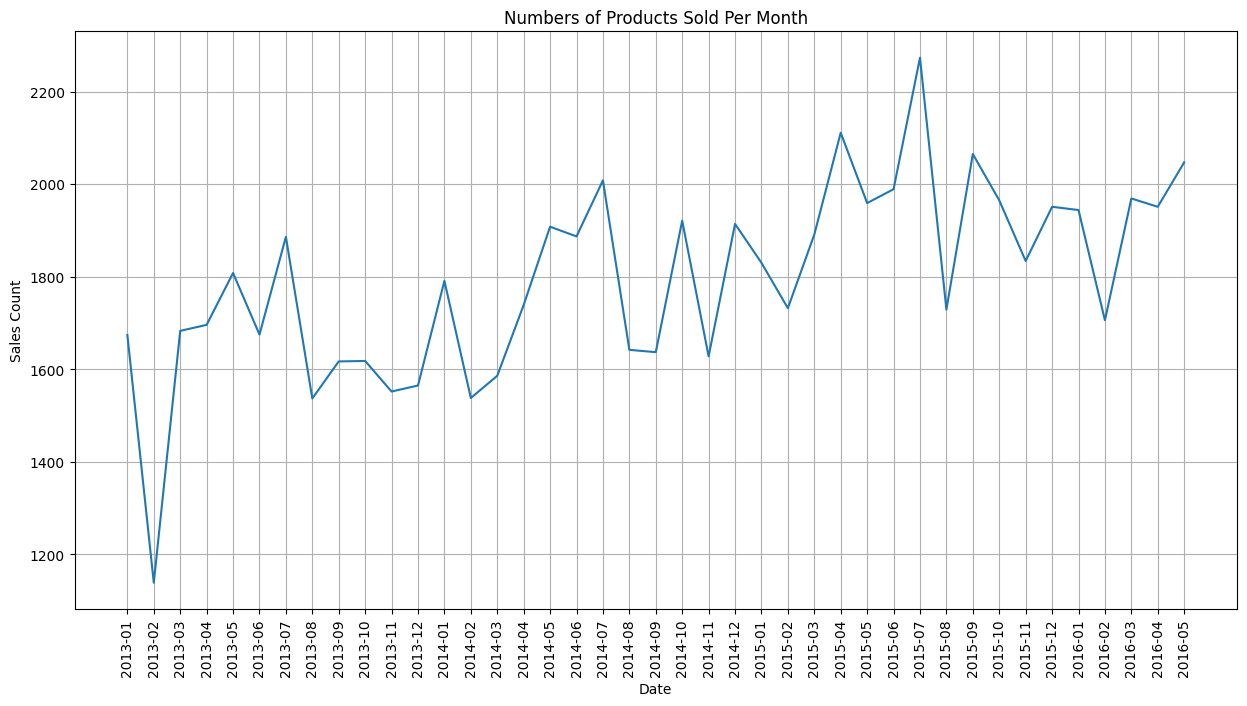

In [4]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['month_year'], data['order_count'])
plt.title('Numbers of Products Sold Per Month')
plt.ylabel('Sales Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [5]:
 data["month_year_idx"] = pd.to_datetime(data["month_year"])
 data.set_index("month_year_idx", inplace=True)
 result_add = seasonal_decompose(data['order_count'], model = 'additive', extrapolate_trend='freq')

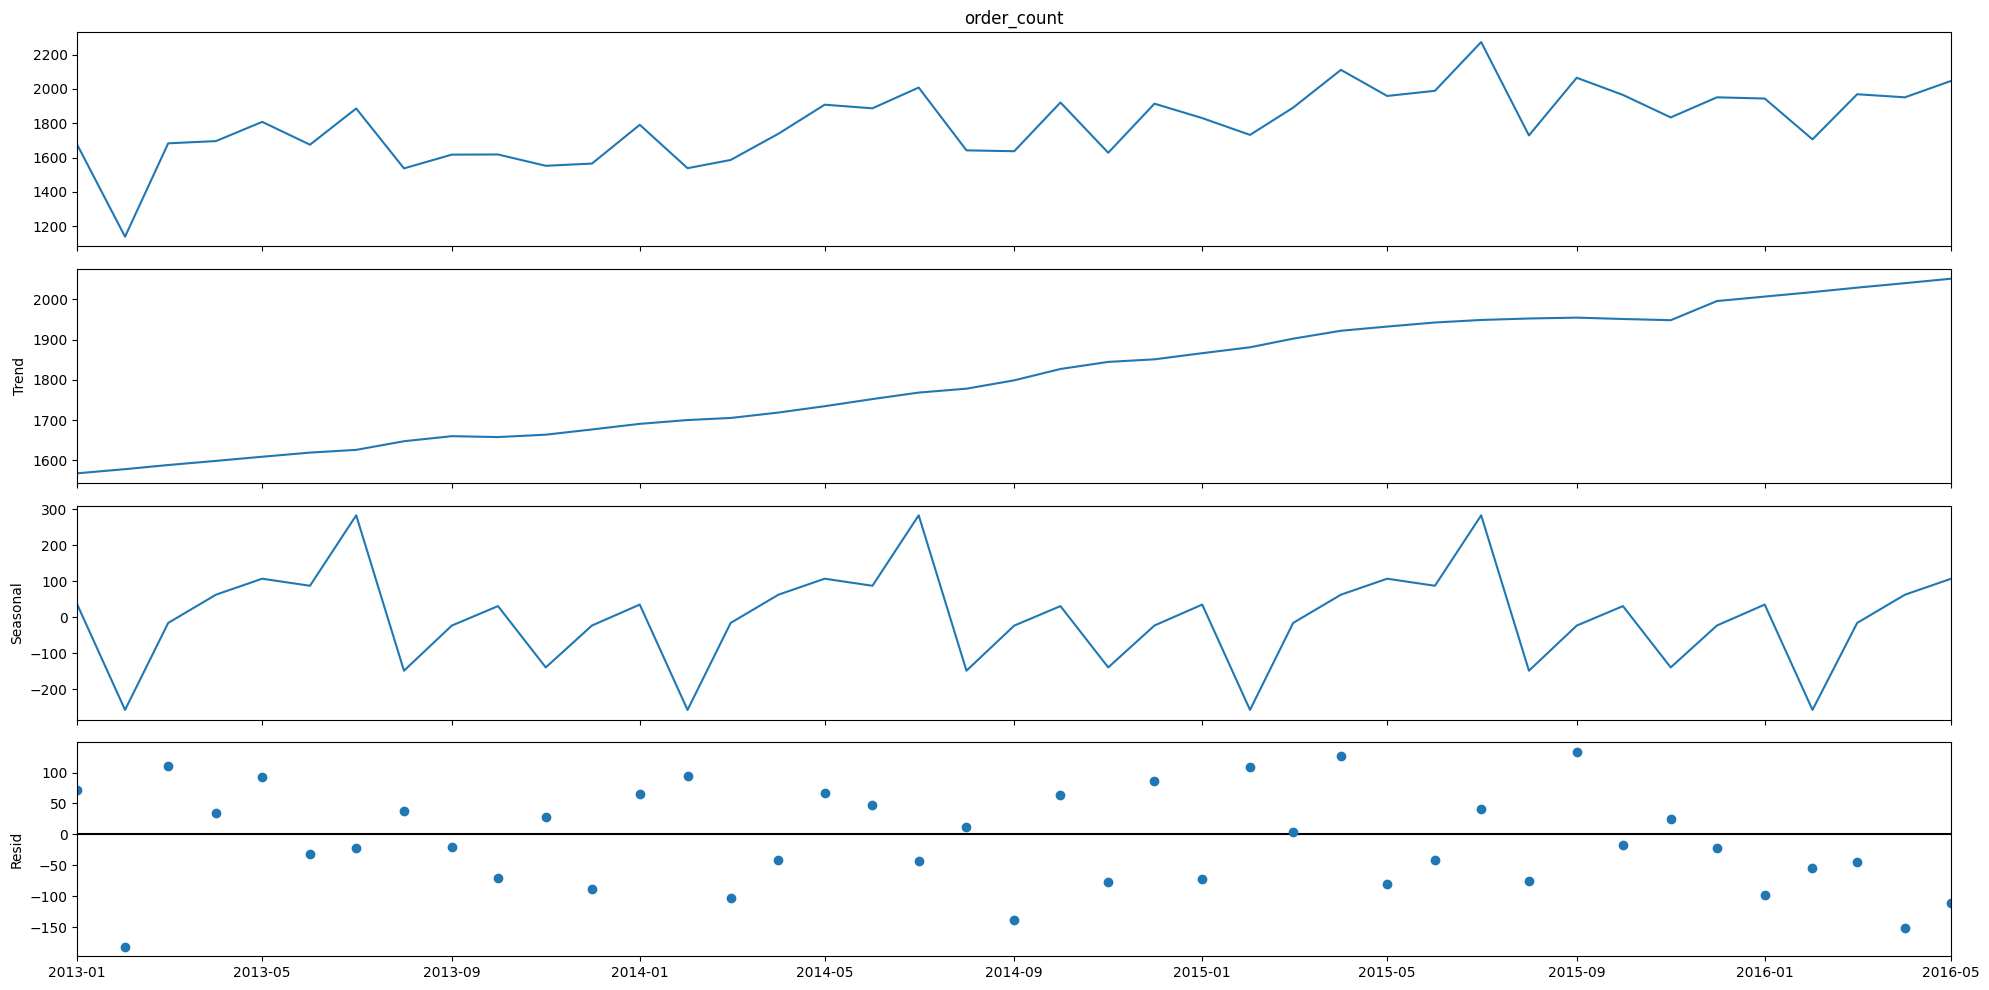

In [6]:
plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot()
plt.show()

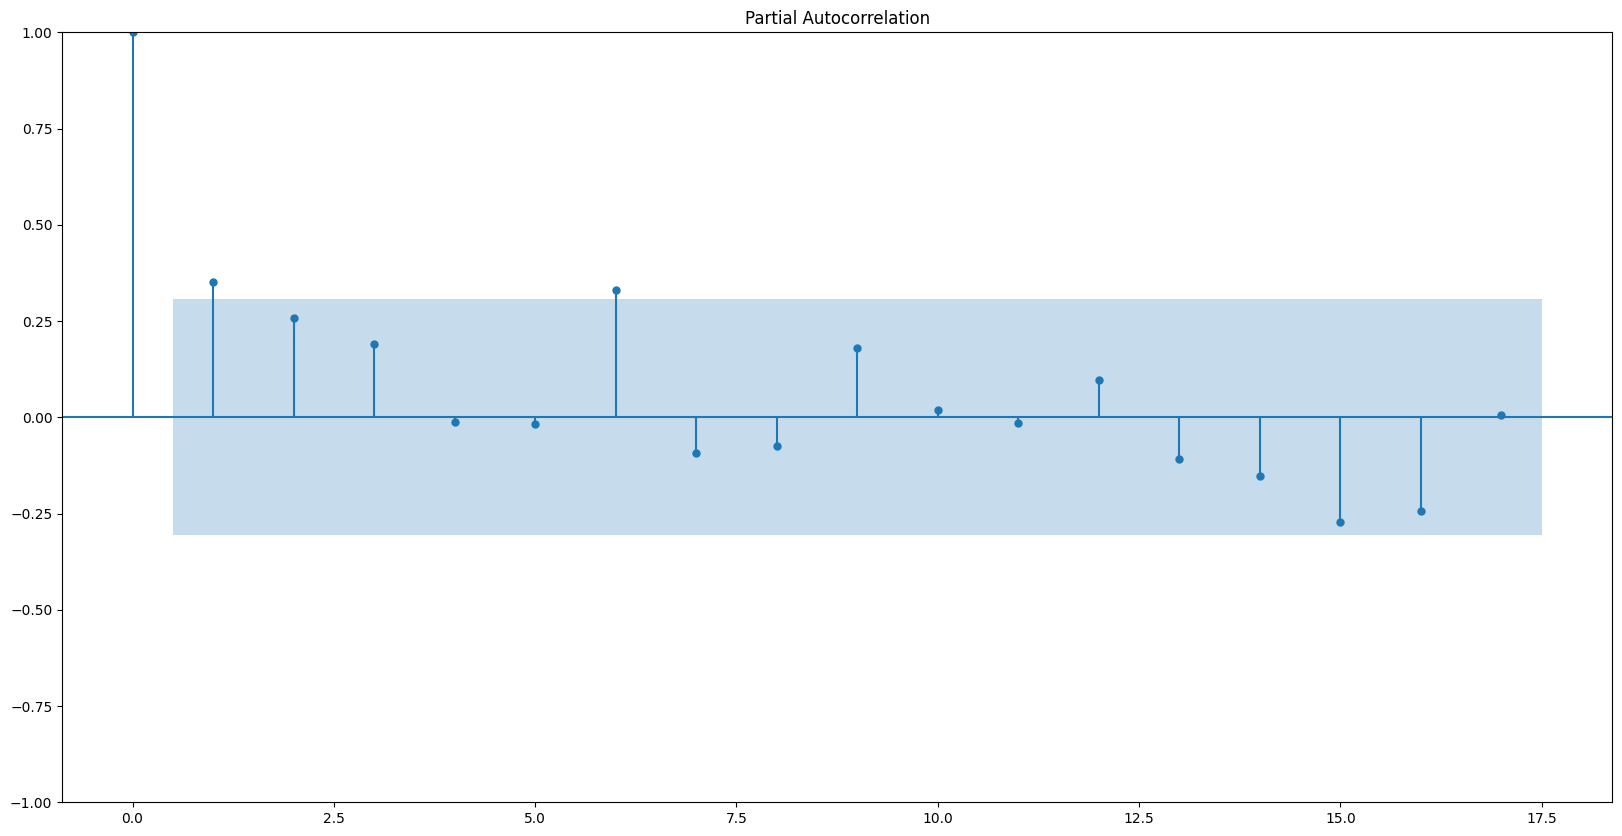

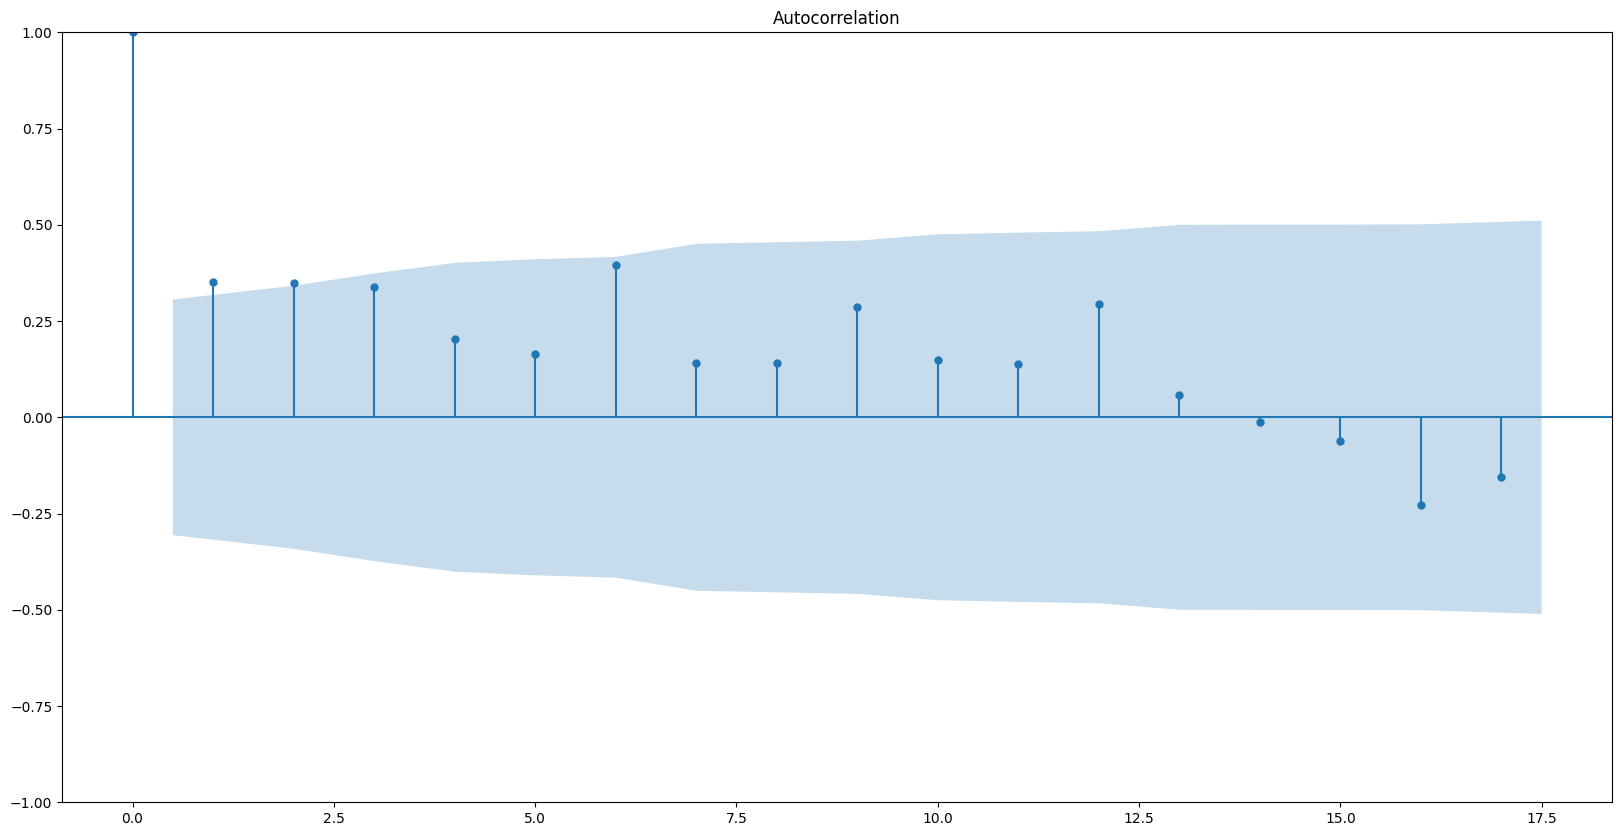

In [7]:
plot_pacf(data['order_count']);
plot_acf(data['order_count']);

ACF gradually decreasing
PACF cuts after x lag.
Suggests AR (x)


ACF cuts after x lag  
PACF gradual decresaing
MA(x)



In [8]:
ad_fuller_result = adfuller(data['order_count'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic_result = adfuller(data['order_count'])
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(-1.1381592679048518, 0.6996171100216303, 9, 31, {'1%': -3.661428725118324, '5%': -2.960525341210433, '10%': -2.6193188033298647}, 387.98584780219824)
======= ADF raw results=====
ADF Statistic: -1.1381592679048518
p-value: 0.6996171100216303
series is NOT stationary p_value=0.6996171100216303


In [ ]:
data.columns

In [9]:
data_diff_series=data['order_count'].diff(1)

In [10]:
data_diff_df=pd.concat([data['month_year'], data_diff_series], axis=1).reset_index()

In [11]:

data_diff_df.dropna(inplace=True)

In [12]:
ad_fuller_result = adfuller(data_diff_df['order_count'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(-3.821483858418713, 0.0026949990071687907, 10, 29, {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}, 372.53091672766953)
======= ADF raw results=====
ADF Statistic: -3.821483858418713
p-value: 0.0026949990071687907
series is stationary p_value=0.0026949990071687907


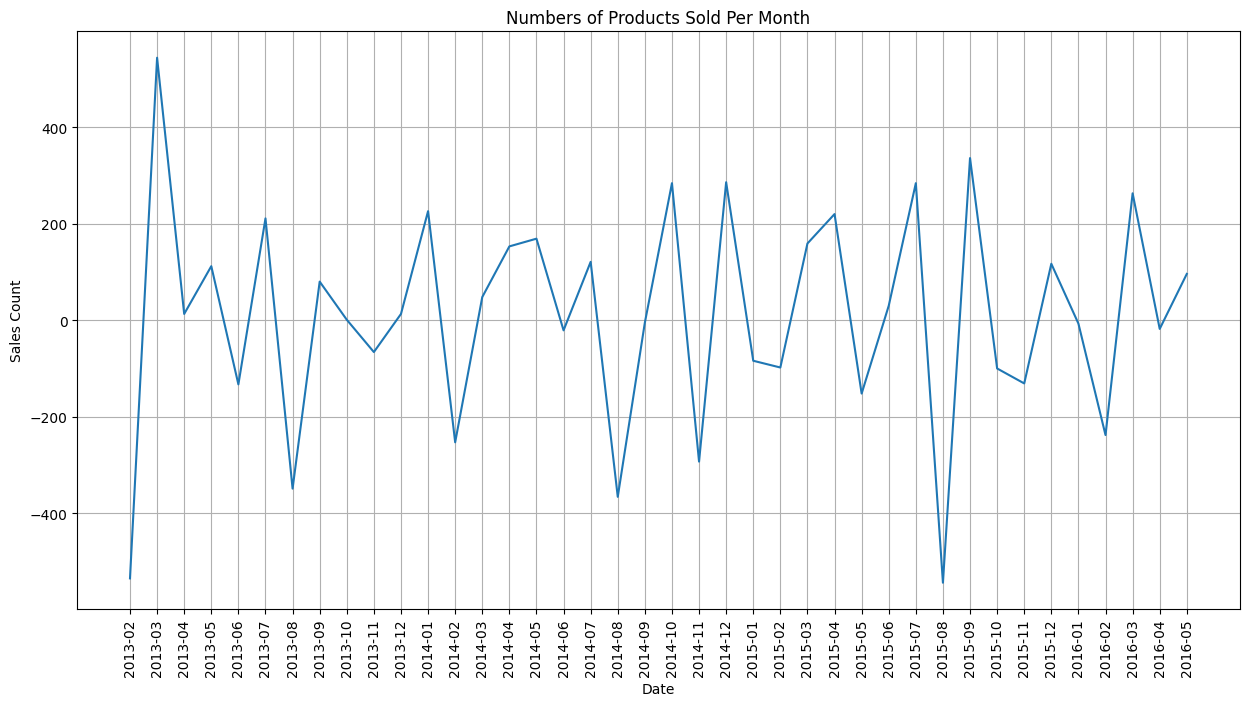

In [15]:
plt.figure(figsize=[15, 7.5]);
plt.plot(data_diff_df['month_year'], data_diff_df['order_count'])
plt.title('Numbers of Products Sold Per Month')
plt.ylabel('Sales Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

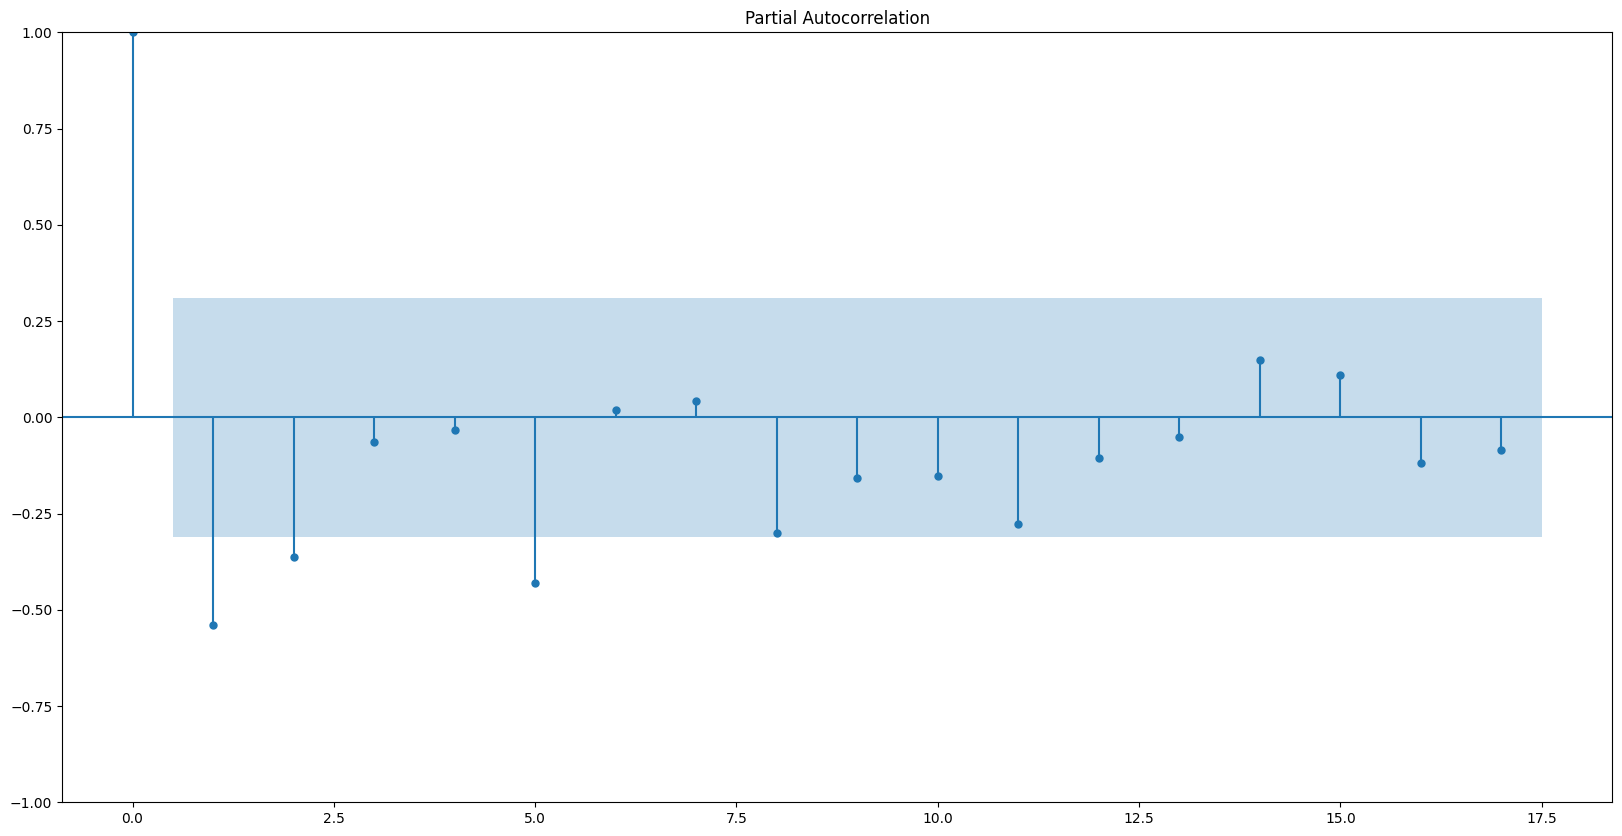

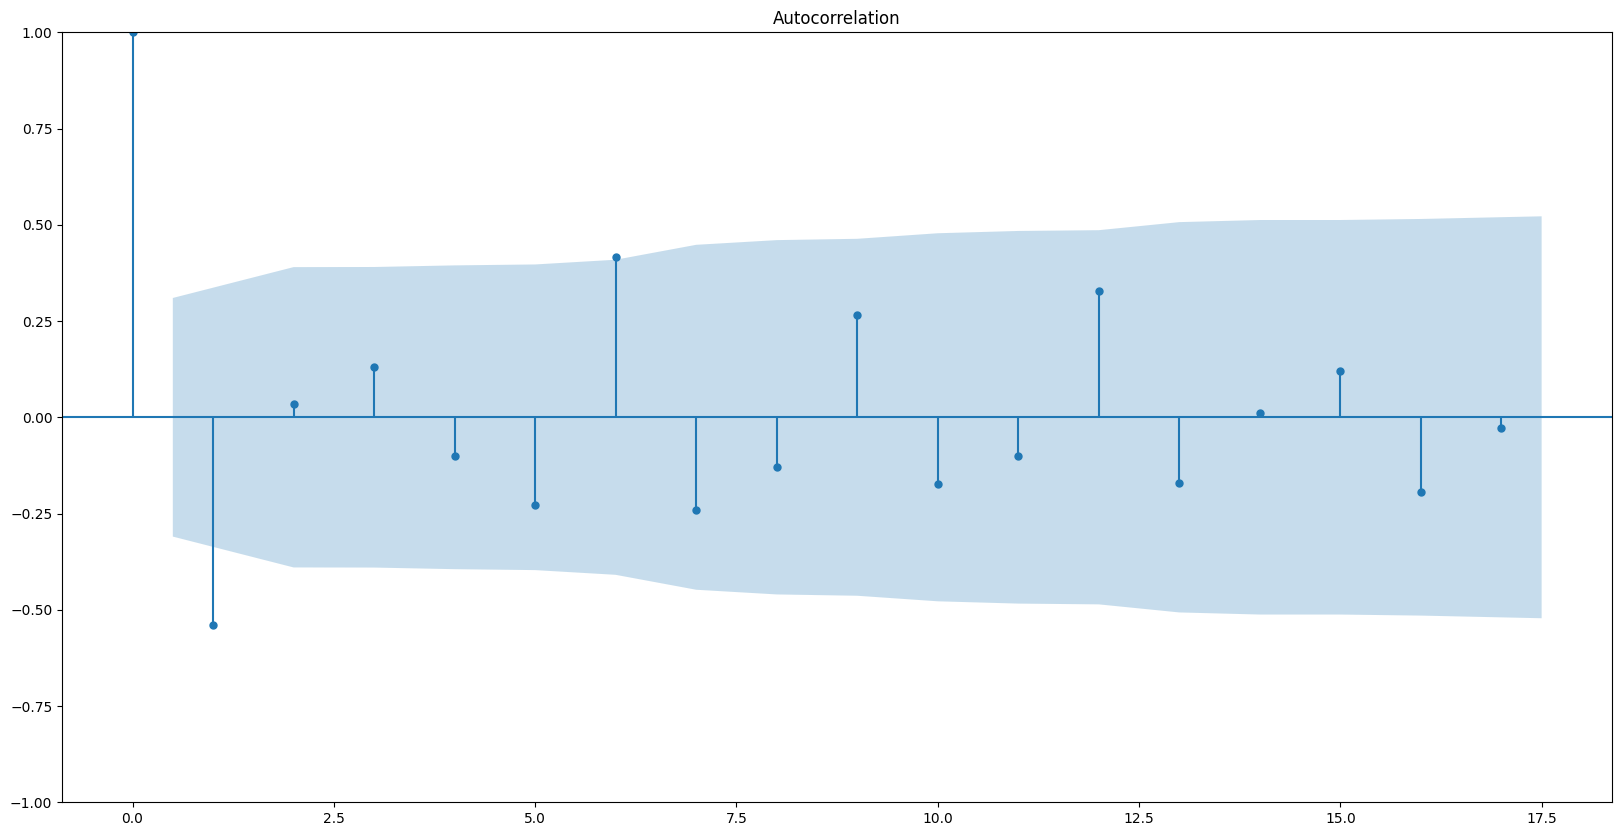

In [16]:
plot_pacf(data_diff_df['order_count']);
plot_acf(data_diff_df['order_count']);

In [21]:
model_list=[]

# Displaying the sorted DataFrame

model_list=[]
# Set these parameters
d=
ar=
ma=

model = SARIMAX(data['order_count'], order=(ar, d, ma) ).fit(disp=-1)
aic = model.aic
print(f"aic={aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


aic=523.830988659302


<ipython-input-22-7f00f0ae0b00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arima_model'][:4+1] = np.NaN


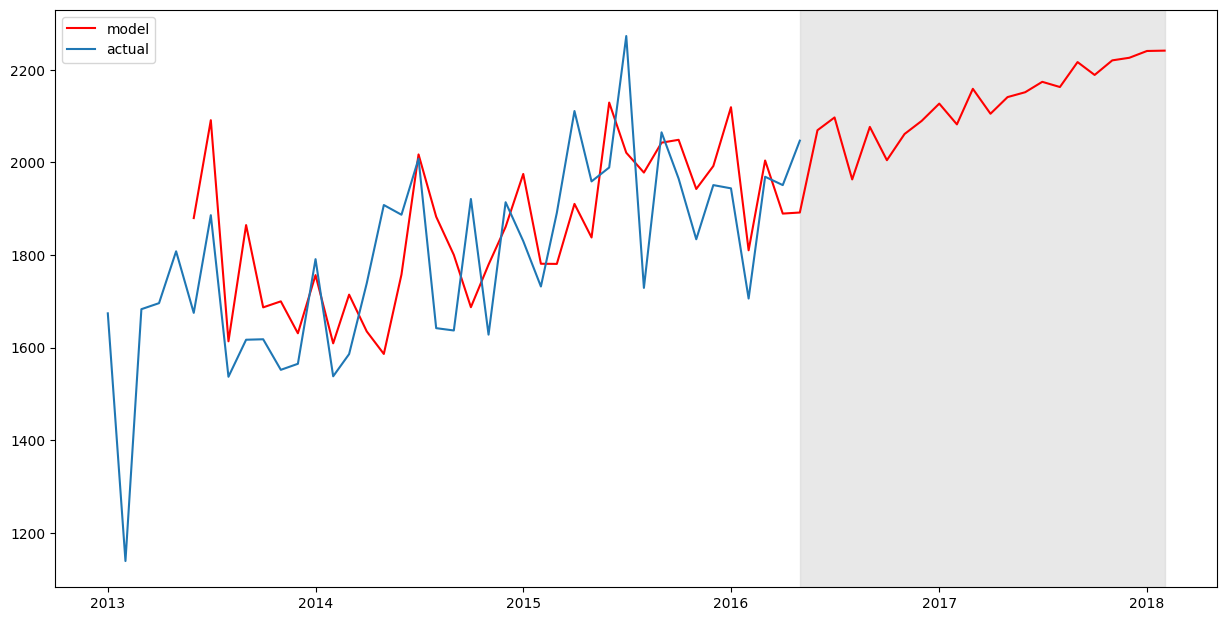

In [22]:
data['arima_model'] = model.fittedvalues
data['arima_model'][:4+1] = np.NaN
forecast = model.predict(start=data.shape[0], end=data.shape[0] + 20)
#forecast = data['arima_model'].append(forecast)
forecast = pd.concat([data['arima_model'], forecast])
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['order_count'], label='actual')
plt.legend()
plt.show()

In [ ]:
results = best_model.fit()
print(results.summary())